In [1]:
#Moving Average for COVID-19
#Reference
#https://towardsdatascience.com/modeling-covid-19-epidemic-with-python-bed21b8f6baf

In [3]:
#Modeling COVID-19 epidemic with Python

#Import data and extracting fields
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [4]:
#Exploring the data US daily report
data = pd.read_csv("https://raw.githubusercontent.com/willmarawee/COVID-19-Infection-and-Mobility/master/daily.csv")
print (data.columns)


Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dateChecked', 'death', 'hospitalized', 'lastModified',
       'total', 'totalTestResults', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash'],
      dtype='object')


In [5]:
#view data
data.head()


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200606,56,1916053,17862820.0,1796.0,30909.0,216259.0,6754.0,8920.0,3476.0,...,2020-06-06T00:00:00Z,19780669,19778873,19778873,746,1007,524103,23326,547429,ec8ad700549425fcbea2a43cc84a1d9d5bdc84dc
1,20200605,56,1892727,17338717.0,1749.0,31335.0,215252.0,6912.0,8863.0,3523.0,...,2020-06-05T00:00:00Z,19233193,19231444,19231444,1100,1440,522300,28615,550915,049411d107563da0cd8a0864bc267a80b46123ac
2,20200604,56,1864112,16816417.0,3474.0,31659.0,213812.0,7054.0,8787.0,3665.0,...,2020-06-04T00:00:00Z,18684003,18680529,18680529,884,-2828,444782,20797,465579,346ee956f287e783d7c182058085c9840357cb44
3,20200603,56,1843315,16371635.0,3556.0,32081.0,216640.0,7224.0,8688.0,3749.0,...,2020-06-03T00:00:00Z,18218506,18214950,18214950,971,2258,437066,20046,457112,5174063654cc33728ecaebda44ace05e0c0a95ac
4,20200602,56,1823269,15934569.0,4054.0,32728.0,214382.0,7403.0,8566.0,3852.0,...,2020-06-02T00:00:00Z,17761892,17757838,17757838,1168,1678,393648,23508,417156,5e2b49203edfff9e99b9012af1f1f92193d5311b


In [6]:
data['diff_hospitalizedCurrently'] = data['hospitalizedCurrently'].diff()
data['diff_totalTestResults'] = data['totalTestResults'].diff()

dates = data['date']
date_format = [pd.to_datetime(d, format = "%Y%m%d", errors="ignore") for d in dates]
date_format

[Timestamp('2020-06-06 00:00:00'),
 Timestamp('2020-06-05 00:00:00'),
 Timestamp('2020-06-04 00:00:00'),
 Timestamp('2020-06-03 00:00:00'),
 Timestamp('2020-06-02 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-05-30 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2020-05-28 00:00:00'),
 Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-05-26 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-23 00:00:00'),
 Timestamp('2020-05-22 00:00:00'),
 Timestamp('2020-05-21 00:00:00'),
 Timestamp('2020-05-20 00:00:00'),
 Timestamp('2020-05-19 00:00:00'),
 Timestamp('2020-05-18 00:00:00'),
 Timestamp('2020-05-17 00:00:00'),
 Timestamp('2020-05-16 00:00:00'),
 Timestamp('2020-05-15 00:00:00'),
 Timestamp('2020-05-14 00:00:00'),
 Timestamp('2020-05-13 00:00:00'),
 Timestamp('2020-05-12 00:00:00'),
 Timestamp('2020-05-11 00:00:00'),
 Timestamp('2020-05-10 00:00:00'),
 Timestamp('2020-05-

C:\Users\maraw\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


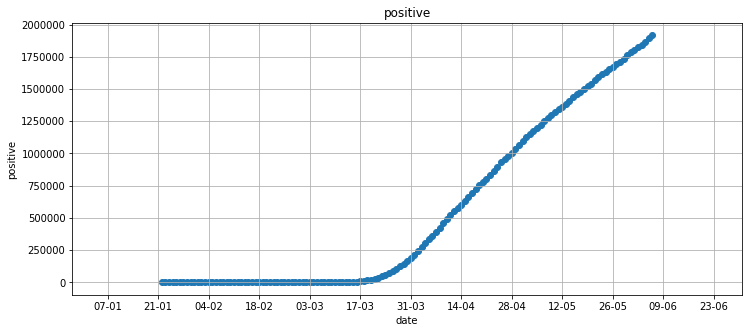

In [7]:
#Visualizing Data
variable = 'positive'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
fig.savefig(variable + '.png')
plt.show()

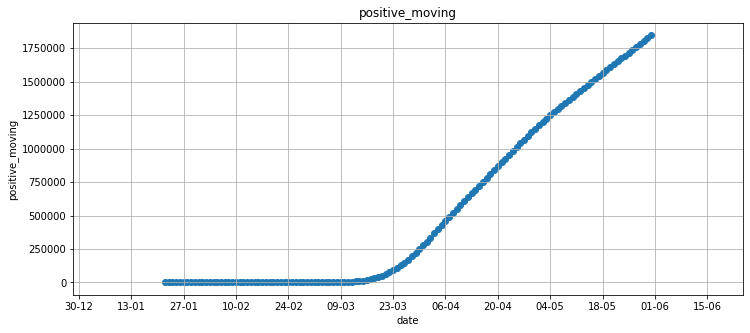

In [8]:
#Correcting Biases
rolling_average_days = 7
data['positive_moving'] = data['positive'].rolling(window=rolling_average_days).mean()
variable = 'positive_moving'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
fig.savefig(variable + '.png')
plt.show()

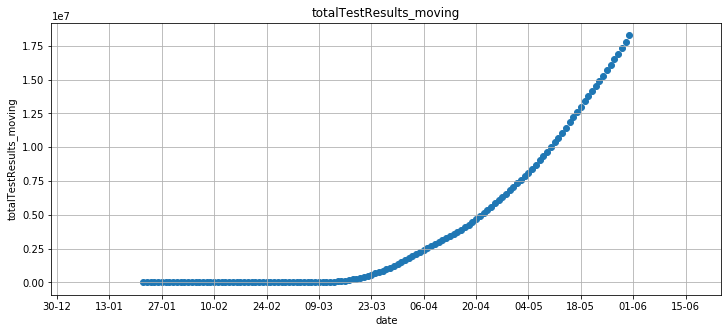

In [9]:

##Calculating moving_average
##In this case, this calculation reflects better accuration of data
data['totalTestResults_moving'] = data['totalTestResults'].rolling(window=rolling_average_days).mean()
variable = 'totalTestResults_moving'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
fig.savefig(variable + '.png')
plt.show()

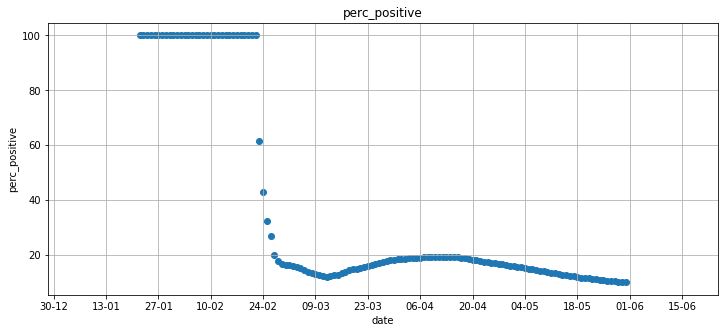

In [10]:

#Calculte the percentage of positive cases
data['perc_positive'] = ((data['positive_moving'])/(data['totalTestResults_moving'])*100)
variable = 'perc_positive'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
fig.savefig(variable + '.png')
plt.show()

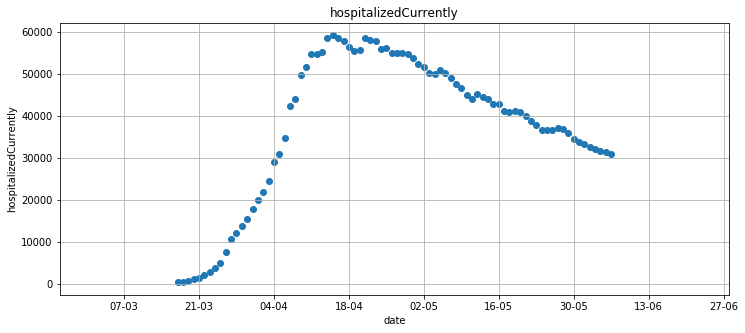

In [11]:
variable = 'hospitalizedCurrently'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
fig.savefig(variable + '.png')
plt.show()

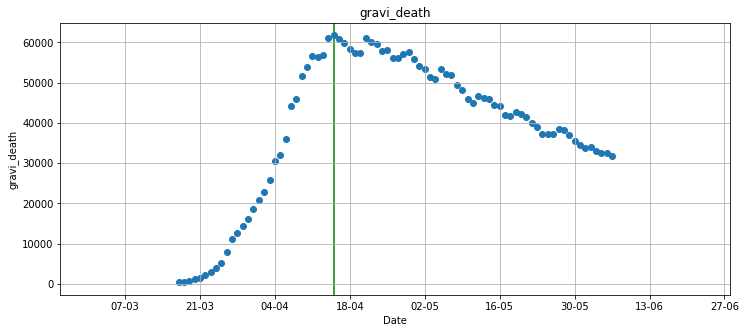

In [13]:
##Creating derived variable for the model

data['gravi_death'] = data['hospitalizedCurrently'] + data['deathIncrease']
variable = 'gravi_death'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
ax.axvline(datetime(2020, 4, 15), c="green", zorder=0)
fig.savefig(variable + '.png')
plt.show()

In [14]:
##Clean up data
data = data.dropna(subset = ["gravi_death"])

In [15]:
##Verify that data was cleaned
data["gravi_death"].isnull().values.any()

False

In [16]:
#Repeat the code to avoid error of following code
dates = data['date']
date_format = [pd.to_datetime(d, format = "%Y%m%d", errors="ignore") for d in dates]

In [17]:
##Modeling the epidemic trend
import numpy as np
from sklearn import linear_model

# prepare the lists for the model
X = date_format
y = data["gravi_death"].tolist()[1:]

# date format is not suitable for modeling, let's transform the date into incrementals number starting from April 15th
starting_date = 53  # April 15th is the 53th day of the series
day_numbers = []
for i in range(1, len(X)):
    day_numbers.append([i])
X = day_numbers

# let's train our model only with data after the peak
X = X[starting_date:]
y = y[starting_date:]

# Instantiate Linear Regression
linear_regr = linear_model.LinearRegression()

# Train the model using the training sets
linear_regr.fit(X, y)
print ("Linear Regression Model Score: %s" % (linear_regr.score(X, y)))


Linear Regression Model Score: 0.9428574017856506


In [18]:
# Predict future trend
from sklearn.metrics import max_error
import math
y_pred = linear_regr.predict(X)
error = max_error(y, y_pred)

In [19]:
X_test = []
future_days = 55
for i in range(starting_date, starting_date + future_days):
    X_test.append([i])
y_pred_linear = linear_regr.predict(X_test)

In [20]:
y_pred_max = []
y_pred_min = []
for i in range(0, len(y_pred_linear)):
    y_pred_max.append(y_pred_linear[i] + error)
    y_pred_min.append(y_pred_linear[i] - error)

In [21]:

#Plot the forecast

# convert date of the epidemic peak into datetime format
from datetime import datetime, timedelta
date_zero = datetime.strptime(str(data["date"][starting_date]), '%Y%m%d')

# creating x_ticks for making the plot more appealing
date_prev = []
x_ticks = []
step = 5

data_curr = date_zero

x_current = starting_date
n = int(future_days / step)
for i in range(0, n):
    date_prev.append(str(data_curr.day) + "/" + str(data_curr.month))
    x_ticks.append(x_current)
    data_curr = data_curr + timedelta(days=step)
    x_current = x_current + step
    


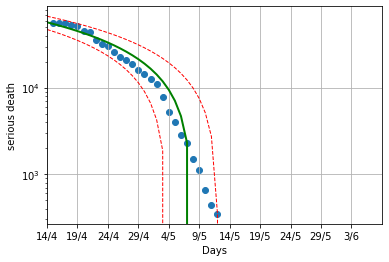

In [22]:
# plot known data
plt.grid()
plt.scatter(X, y)

# plot linear regression prediction
plt.plot(X_test, y_pred_linear, color='green', linewidth=2)

# plot maximum error
plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')

#plot minimum error
plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
plt.xlabel('Days')
plt.xlim(starting_date, starting_date + future_days)
plt.xticks(x_ticks, date_prev)
plt.ylabel('serious death')
plt.yscale("log")
plt.savefig("prediction.png")
plt.show()

In [23]:

import math
def n_to_date(n):
    #it converts a number to a date, considering starting from starting_date
    return (date_zero + timedelta(days=n-starting_date)).strftime('%d/%m/%Y')
def build_line(x1,y1,x2,y2):
    m = float(y2 - y1)/(x2-x1)
    q = y1 - (m*x1)
    return [m,q]

data_zero = round(- linear_regr.intercept_ / linear_regr.coef_[0])

line_max = build_line(X_test[0][0], y_pred_max[0], X_test[1][0], y_pred_max[1])
data_zero_max = math.ceil(- line_max[1] / line_max[0])
data_zero_max = n_to_date(data_zero_max)

line_min = build_line(X_test[0][0], y_pred_min[0], X_test[1][0], y_pred_min[1])
data_zero_min = math.floor(- line_min[1] / line_min[0])
data_zero_min = n_to_date(data_zero_min)
print ()
print ("Zero intensive cares and deaths expected between %s and %s" % (data_zero_min, data_zero_max))


Zero intensive cares and deaths expected between 03/05/2020 and 13/05/2020


In [24]:
#Regional Trends 
#zone1 West Coast
#NY and NJ
data = pd.read_csv("https://raw.githubusercontent.com/willmarawee/COVID-19-Infection-and-Mobility/master/combined_csv.csv")
zone1_df = data[data.Province_State.isin(['New York','New Jersey'])]
zone1_df['Deaths'].sum()
print("Zone 1 accounts for %s percent of the total deaths" % (round(zone1_df['Deaths'].sum() / data['Deaths'].sum() * 100,2)))


Zone 1 accounts for 41.17 percent of the total deaths


In [25]:
#Regional Trends
#zone2 East Coast
#CA and WA
data = pd.read_csv("https://raw.githubusercontent.com/willmarawee/COVID-19-Infection-and-Mobility/master/combined_csv.csv")
zone2_df = data[data.Province_State.isin(['California','Washington'])]
zone2_df['Deaths'].sum()
print("Zone 2 accounts for %s percent of the total deaths" % (round(zone2_df['Deaths'].sum() / data['Deaths'].sum() * 100,2)))


Zone 2 accounts for 4.95 percent of the total deaths


In [26]:
#Regional Trends
#zone3
#Colorado
data = pd.read_csv("https://raw.githubusercontent.com/willmarawee/COVID-19-Infection-and-Mobility/master/combined_csv.csv")
zone3_df = data[data.Province_State.isin(['Colorado'])]
zone3_df['Deaths'].sum()
print("Zone 3 accounts for %s percent of the total deaths" % (round(zone3_df['Deaths'].sum() / data['Deaths'].sum() * 100,2)))


Zone 3 accounts for 1.36 percent of the total deaths


In [27]:
#Regional Trends
#zone4
#TX
data = pd.read_csv("https://raw.githubusercontent.com/willmarawee/COVID-19-Infection-and-Mobility/master/combined_csv.csv")
zone4_df = data[data.Province_State.isin(['Texas'])]
zone4_df['Deaths'].sum()
print("Zone 4 accounts for %s percent of the total deaths" % (round(zone4_df['Deaths'].sum() / data['Deaths'].sum() * 100,2)))


Zone 4 accounts for 1.55 percent of the total deaths
